<a href="https://colab.research.google.com/github/anjunjin/PFE-ING3-IA/blob/branch1/Repr%C3%A9sentation_du_texte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie "commune"

In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
DATA_PATH = "/content/drive/My Drive/PFE/"
data = pd.read_csv(DATA_PATH+"Tweets_nettoyés_040222.csv", encoding='utf-8').drop(['Unnamed: 0'], axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# data = data.sample(n=20000, replace=False, random_state=42)

In [3]:
data.shape

(722273, 9)

In [4]:
# data.sort_values(by = 'cleaned').tail(100)

In [5]:
data = data.dropna()

In [6]:
# data.sort_values(by = 'cleaned').tail(100)

In [7]:
data.shape

(721518, 9)

In [8]:
!pip install scattertext

In [9]:
import scattertext as st
"""import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.fr import French"""
import numpy as np
import math

In [10]:
# spacy.cli.download('fr_core_news_md')

In [11]:
# nlp = spacy.load("fr_core_news_md")

Besoin de cette ligne parce que certains tweets cleaned sont vides

In [12]:
# data = data.drop(data[data.index.isin([35203, 35220, 111663, 111664, 111665, 111666, 111667, 142467, 247758, 249448, 458701, 545318, 545319, 548835, 549118, 550069, 584385, 584386, 584387, 596245, 596709, 596779, 634646, 663672, 663701, 663706, 700933])].index)

In [13]:
# data

In [14]:
"""mask = data.applymap(lambda x: x is None)
cols = data.columns[(mask).any()]
for col in data[cols]:
    data.loc[mask[col], col] = ''
data"""

"""test_list = list(data['cleaned'])
res = list(filter(None, test_list))
data['cleaned'] = pd.DataFrame(res)"""

"test_list = list(data['cleaned'])\nres = list(filter(None, test_list))\ndata['cleaned'] = pd.DataFrame(res)"

In [15]:
# data

In [16]:
data = data.dropna()

In [17]:
data.shape

(721518, 9)

In [18]:
# data

In [19]:
# data.sort_values(by = 'cleaned').tail(100)

In [20]:
# data['parsed'] = data.cleaned.apply(nlp)

In [21]:
# data.sample(random_state=42, n=5, replace=False)

In [22]:
# data.sort_values(by='cleaned').tail(10)

In [23]:
"""data['cleaned'].tolist()"""

"data['cleaned'].tolist()"

In [24]:
# transmettre les liste de mots en phrase(texte)
def return_text(result):
  result_txt = result.text
  return result_txt

In [25]:
# data

In [26]:
# data['parsed'] = data['parsed'].apply(lambda x: return_text(x))

In [27]:
data

,liability,liability_label,description,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned
0,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,50.0,101.0,98322.0,🚨Le professeur Raoult écope d’un blâme de l’Or...,🚨le professeur raoult écope ’un blâme ’ordre m...
1,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,643.0,0.0,98322.0,RT @DIVIZIO1: Recours déposé !,rt recours déposé
2,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,27.0,59.0,98322.0,"🎙BEST OF - Pr Michel Drancourt : IHU, épidémie...",🎙best of pr michel drancourt ihu épidémies dhi...
3,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,14.0,37.0,98322.0,"📚 Jonathan Curiel, directeur général adjoint d...",📚 jonathan curiel directeur général adjoint pr...
4,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,39.0,79.0,98322.0,🖍 Le dessin du jour\n&gt; à retrouver sur http...,🖍 dessin jour retrouver desident_link desiden...
...,...,...,...,...,...,...,...,...,...
722268,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,1.0,1.0,73496.0,@aubreyrumore wikiHow loves you more tho,wikihow loves you more tho
722269,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,8.0,19.0,73496.0,"""i.e. = """"id est"""" (that is)\ne.g. = """"exempli...",ie id that is eg exempli gratia for the sake o...
722270,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,84.0,360.0,73496.0,@Thundercat https://t.co/5FYXI3t5Oa,desident_link
722271,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,0.0,2.0,73496.0,"""Throw some D's on that"" - ancient proverb htt...",throw some ds that ancient proverb desident_li...


# Séparation en 3

Divisier le model en 3 partie : train(60%), test(20%), valid(20%)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# X : le tweet
X = data['cleaned']
# y : site fiable / pas fiable
y = data['liability_label']

In [30]:
# 100% dataset : 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
# 80% dataset(train) : 80%*0.75=60% train  80%*0.25=20% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [32]:
print("X_train.shape : ",X_train.shape,", X_val.shape : ",X_val.shape, ", X_test.shape : ",X_test.shape)

X_train.shape :  (432910,) , X_val.shape :  (144304,) , X_test.shape :  (144304,)


Visualiser le distribution de model

In [33]:
import matplotlib.pyplot as plt
import numpy as np

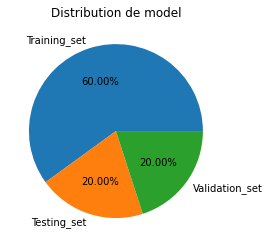

In [34]:
model_size = np.array([X_train.count(), X_test.count(), X_val.count()])

plt.pie(model_size,
        # labels de pie chart
        labels=['Training_set','Testing_set','Validation_set'], 
        # pourcentage
        autopct='%.2f%%', 
       )
plt.title("Distribution de model")
plt.show()

# Bag of words

In [35]:
"""from sklearn.feature_extraction.text import CountVectorizer"""

'from sklearn.feature_extraction.text import CountVectorizer'

In [36]:
"""# créer un objet de CountVectorizer
countvectorizer = CountVectorizer()
# countvectorizer = CountVectorizer(min_df=50, max_df=0.95)"""

'# créer un objet de CountVectorizer\ncountvectorizer = CountVectorizer()\n# countvectorizer = CountVectorizer(min_df=50, max_df=0.95)'

In [37]:
"""# fonction Bag_of_words 
# Entrée : list de tweet
# Sortie : vecteurs de tweet
def bag_of_words(text):
  bag = countvectorizer.fit_transform(text)
  return bag"""

'# fonction Bag_of_words \n# Entrée : list de tweet\n# Sortie : vecteurs de tweet\ndef bag_of_words(text):\n  bag = countvectorizer.fit_transform(text)\n  return bag'

In [38]:
# un exemple de test
"""exemple = X_train[0]
exemple1 = X_train[10]
exemple2 = X_train[20]

print('exemple : ', exemple)
print('exemple1 : ', exemple1)
print('exemple2 : ', exemple2)


bag = bag_of_words([exemple, exemple1,exemple2])
bag.toarray()
feature_names = countvectorizer.get_feature_names()
pd.DataFrame(bag.toarray(), columns=feature_names)
"""

"exemple = X_train[0]\nexemple1 = X_train[10]\nexemple2 = X_train[20]\n\nprint('exemple : ', exemple)\nprint('exemple1 : ', exemple1)\nprint('exemple2 : ', exemple2)\n\n\nbag = bag_of_words([exemple, exemple1,exemple2])\nbag.toarray()\nfeature_names = countvectorizer.get_feature_names()\npd.DataFrame(bag.toarray(), columns=feature_names)\n"

In [39]:
"""tweet = np.array(X_train)"""

'tweet = np.array(X_train)'

In [40]:
"""len(X_train)"""

'len(X_train)'

In [41]:
"""bag = countvectorizer.fit_transform(tweet)
bag.toarray()"""

'bag = countvectorizer.fit_transform(tweet)\nbag.toarray()'

In [42]:
"""feature_names = countvectorizer.get_feature_names()
pd.DataFrame(bag.toarray(), columns=feature_names)"""

'feature_names = countvectorizer.get_feature_names()\npd.DataFrame(bag.toarray(), columns=feature_names)'

In [43]:
"""len(tweet)"""

'len(tweet)'

In [44]:
"""text = []
for tweet in X_train:
  text.append(tweet)
print(text)

bag = bag_of_words(text)
bag.toarray()"""

'text = []\nfor tweet in X_train:\n  text.append(tweet)\nprint(text)\n\nbag = bag_of_words(text)\nbag.toarray()'

# TF-IDF

In [45]:
X_train.shape

(432910,)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1000, max_df=0.9)
X = vectorizer.fit_transform(X_train.tolist())

In [47]:
featured_names = vectorizer.get_feature_names()
len(featured_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


318

In [48]:
print(f'Feature names \n{featured_names}')

Feature names 
['accident', 'affaire', 'ai', 'alerte', 'amp', 'américain', 'an', 'ancien', 'and', 'annonce', 'année', 'années', 'ans', 'appel', 'appelle', 'article', 'aujourd', 'aujourdhui', 'autour', 'avez', 'belle', 'biden', 'bientôt', 'bon', 'bonjour', 'bonne', 'campagne', 'candidat', 'cas', 'cause', 'centre', 'cest', 'chef', 'chine', 'cinéma', 'compte', 'condamné', 'confinement', 'conseil', 'coronavirus', 'corps', 'coup', 'cours', 'covid', 'covid19', 'crise', 'cœur', 'de', 'demain', 'demande', 'dernière', 'desident_date', 'desident_link', 'desident_number', 'direct', 'disponible', 'donne', 'dose', 'droit', 'droite', 'dun', 'dune', 'débat', 'début', 'découvrez', 'décès', 'déjà', 'dêtre', 'emmanuel', 'en', 'enfant', 'enfants', 'enquête', 'entretien', 'er', 'eric', 'est', 'et', 'etatsunis', 'europe', 'européenne', 'euros', 'explique', 'face', 'facebook', 'faire', 'famille', 'faut', 'femme', 'femmes', 'festival', 'feu', 'fille', 'film', 'fin', 'fois', 'football', 'for', 'france', 'fran

In [49]:
# matrix = X.todense()

J'ai trouvé ce qui saturait la RAM, la matrice sous forme de liste ne sera donc plus enregistrée dans une variable pour libérer de la mémoire vive

In [50]:
# denseliste = matrix.tolist()

In [51]:
# df = pd.DataFrame(denseliste, columns=featured_names)
# df = pd.DataFrame(matrix.tolist(), columns=featured_names)
df = pd.DataFrame(X.todense().tolist(), columns=featured_names)
# print(f'Final result of TF-IDF \n{df}')
# passer modèle non supervisé pour réduire nb colonne : trucated svd (méthode de clustering) obtenir plutôt 500 colonnes
df

,accident,affaire,ai,alerte,amp,américain,an,ancien,and,annonce,année,années,ans,appel,appelle,article,aujourd,aujourdhui,autour,avez,belle,biden,bientôt,bon,bonjour,bonne,campagne,candidat,cas,cause,centre,cest,chef,chine,cinéma,compte,condamné,confinement,conseil,coronavirus,...,temps,terre,the,to,top,tour,train,travail,trump,twitter,tête,un,une,us,vaccin,vaccination,vague,variant,veut,victime,victimes,video,vidéo,vie,vient,ville,violences,voir,voiture,vraiment,vue,weekend,with,zemmour,épisode,éric,état,étatsunis,étude,être
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.721755,0.0,0.0,0.0,0.000000,0.0,0.0,0.682194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.404674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.485646,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.566441,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615065,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.980832,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
432906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
432907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
432908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.971609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0

In [53]:
print(vectorizer.get_feature_names_out())
print('\n')
print(X.shape)

['accident' 'affaire' 'ai' 'alerte' 'amp' 'américain' 'an' 'ancien' 'and'
 'annonce' 'année' 'années' 'ans' 'appel' 'appelle' 'article' 'aujourd'
 'aujourdhui' 'autour' 'avez' 'belle' 'biden' 'bientôt' 'bon' 'bonjour'
 'bonne' 'campagne' 'candidat' 'cas' 'cause' 'centre' 'cest' 'chef'
 'chine' 'cinéma' 'compte' 'condamné' 'confinement' 'conseil'
 'coronavirus' 'corps' 'coup' 'cours' 'covid' 'covid19' 'crise' 'cœur'
 'de' 'demain' 'demande' 'dernière' 'desident_date' 'desident_link'
 'desident_number' 'direct' 'disponible' 'donne' 'dose' 'droit' 'droite'
 'dun' 'dune' 'débat' 'début' 'découvrez' 'décès' 'déjà' 'dêtre'
 'emmanuel' 'en' 'enfant' 'enfants' 'enquête' 'entretien' 'er' 'eric'
 'est' 'et' 'etatsunis' 'europe' 'européenne' 'euros' 'explique' 'face'
 'facebook' 'faire' 'famille' 'faut' 'femme' 'femmes' 'festival' 'feu'
 'fille' 'film' 'fin' 'fois' 'football' 'for' 'france' 'français'
 'française' 'françois' 'fête' 'garde' 'gauche' 'gouvernement' 'grand'
 'grande' 'grands' 'gros'

In [ ]:
"""test = 0
for item in featured_names:
  if ((item[0] == '0') or (item[0] == '1') or (item[0] == '2') or (item[0] == '3') or (item[0] == '4') or (item[0] == '5') or (item[0] == '6') or (item[0] == '7') or (item[0] == '8') or (item[0] == '9')):
    test = test + 1
print(test)"""

# SVM avec TF-IDF

Partie où l'on s'assure que les données ont la bonne forme

In [54]:
data.sort_values(by='cleaned').tail(10)

,liability,liability_label,description,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned
44252,1,site plutôt douteux,Une page Facebook sensationnaliste qui agrège ...,EuroScoop_FR,0.0,0.0,250.0,󾓶⚡󾓶⚡ https://t.co/nu8vFLv6Ac,󾓶⚡󾓶⚡ desident_link
44278,1,site plutôt douteux,Une page Facebook sensationnaliste qui agrège ...,EuroScoop_FR,0.0,0.0,250.0,󾓶󾌯 https://t.co/LglWm10Zcw,󾓶󾌯 desident_link
44116,1,site plutôt douteux,Une page Facebook sensationnaliste qui agrège ...,EuroScoop_FR,0.0,0.0,250.0,󾓶󾓶󾓶 https://t.co/cSLS6ltxSE,󾓶󾓶󾓶 desident_link
44314,1,site plutôt douteux,Une page Facebook sensationnaliste qui agrège ...,EuroScoop_FR,0.0,0.0,250.0,󾓶󾓶󾓶 https://t.co/sny1CuMZtJ,󾓶󾓶󾓶 desident_link
40693,1,site plutôt douteux,Un site sensationnaliste belge qui peut s'avér...,LBDTSS,0.0,0.0,78.0,󾦃󾦃󾌴󾌴 https://t.co/GeElJySTy1,󾦃󾦃󾌴󾌴 desident_link
44035,1,site plutôt douteux,Une page Facebook sensationnaliste qui agrège ...,EuroScoop_FR,0.0,0.0,250.0,Aie aie aie... 󾬎 https://t.co/yPRb8BAilX,󾬎 desident_link
584849,0,site plutôt fiable,"Un site de divertissement francophone, spécial...",minutebuzz,1.0,0.0,48184.0,󾮖󾭚 https://t.co/SR0fky4Z8q,󾮖󾭚 desident_link
43577,1,site plutôt douteux,Une page Facebook sensationnaliste qui agrège ...,EuroScoop_FR,0.0,0.0,250.0,Très TOUCHANT !! 󾮞☺ https://t.co/uVYVm9Gzu3,󾮞☺ desident_link
44466,1,site plutôt douteux,Une page Facebook sensationnaliste qui agrège ...,EuroScoop_FR,0.0,0.0,250.0,󾮟󾮞 ... alors SATISFAIT maintenant ? https://t....,󾮟󾮞 satisfait desident_link
584843,0,site plutôt fiable,"Un site de divertissement francophone, spécial...",minutebuzz,0.0,2.0,48184.0,󾰮 https://t.co/w1kSgHckdF,󾰮 desident_link


In [ ]:
"""data['cleaned'] = data['cleaned'].apply(lambda x : x.split())"""

In [ ]:
"""data.sort_values(by='cleaned').tail(10)"""

train et test du tuto, comme c'est plus exactement les même données je ne sais pas si je peux utiliser la séparation des données faites plus tôt

In [55]:
from sklearn import model_selection, naive_bayes, svm

In [56]:
"""SVM_Train_X, SVM_Test_X, SVM_Train_Y, SVM_Test_Y = model_selection.train_test_split(data['tweet'],Corpus['liability'],test_size=0.3)"""

"SVM_Train_X, SVM_Test_X, SVM_Train_Y, SVM_Test_Y = model_selection.train_test_split(data['tweet'],Corpus['liability'],test_size=0.3)"

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
"""Encoder = LabelEncoder()
SVM_Train_Y = Encoder.fit_transform(SVM_Train_Y)
SVM_Test_Y = Encoder.fit_transform(SVM_Test_Y)"""

'Encoder = LabelEncoder()\nSVM_Train_Y = Encoder.fit_transform(SVM_Train_Y)\nSVM_Test_Y = Encoder.fit_transform(SVM_Test_Y)'

Apparemment je refais le TF-IDF, à voir si c'est la même chose que j'avais fais et si ce que j'écris actuellement ne sert pas à rien

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
"""SVM_Tfidf_vect = TfidfVectorizer(max_features=5000)
SVM_Tfidf_vect.fit(data['tweet'])

SVM_Train_X_Tfidf = SVM_Tfidf_vect.transform(SVM_Train_X)
SVM_Test_X_Tfidf = SVM_Tfidf_vect.transform(SVM_Test_X)"""

Train_X_Tfidf = vectorizer.transform(X_train)
Test_X_Tfidf = vectorizer.transform(X_test)

In [61]:
"""print(SVM_Tfidf_vect.vocabulary_)
print(len(SVM_Tfidf_vect.vocabulary_))"""

print(vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))

{'rt': 258, 'loi': 152, 'violences': 304, 'victime': 297, 'desident_link': 52, 'desident_number': 53, 'ans': 12, 'une': 290, 'replay': 253, 'présidentielle': 238, 'desident_date': 51, 'tour': 283, 'mort': 177, 'condamné': 36, 'mois': 174, 'la': 142, 'est': 76, 'nom': 188, 'lire': 149, 'site': 268, 'face': 83, 'to': 281, 'question': 242, 'jour': 136, 'projet': 234, 'grand': 106, 'fin': 94, 'découvrez': 64, 'aujourdhui': 17, 'mieux': 167, 'faire': 85, 'info': 125, 'millions': 170, 'ancien': 7, 'cause': 29, 'dune': 61, 'prix': 231, 'hommes': 119, 'histoire': 116, 'suite': 274, 'propos': 235, 'européenne': 80, 'crise': 45, 'hausse': 113, 'demande': 49, 'en': 69, 'terre': 279, 'livre': 151, 'grande': 107, 'dernière': 50, 'dun': 60, 'épisode': 312, 'philippe': 216, 'france': 98, 'twitter': 287, 'appel': 13, 'ligne': 148, 'homme': 118, 'sortie': 273, 'médias': 180, 'français': 99, 'nouveaux': 191, 'cas': 28, 'personnes': 213, 'état': 314, 'vidéo': 300, 'petit': 214, 'nord': 190, 'page': 202, 

In [62]:
"""print(SVM_Train_X_Tfidf)"""
print(Train_X_Tfidf)

  (0, 258)	0.4288445113457782
  (0, 152)	0.9033783178096544
  (1, 304)	0.6821940145365303
  (1, 297)	0.7217548523554296
  (1, 52)	0.11696691682661615
  (2, 290)	0.4856462979047944
  (2, 253)	0.6169450228187703
  (2, 53)	0.45831817883964276
  (2, 52)	0.09854023752655001
  (2, 12)	0.40467367184416486
  (3, 283)	0.5664408480977514
  (3, 238)	0.5551933059819583
  (3, 52)	0.09900653585656416
  (3, 51)	0.6009183509070153
  (4, 177)	0.5282460295477857
  (4, 174)	0.5245165359671299
  (4, 53)	0.2387360989156779
  (4, 52)	0.1026584280504564
  (4, 36)	0.6150649217674306
  (5, 188)	0.6653864896622184
  (5, 142)	0.5778296865598489
  (5, 76)	0.46049451544316594
  (5, 52)	0.10638831680171057
  (6, 297)	0.6247683932195414
  (6, 53)	0.47091861646230937
  :	:
  (432903, 52)	0.2853206406011729
  (432903, 51)	0.4329370968957666
  (432903, 15)	0.8550775416173682
  (432904, 299)	0.813416629673856
  (432904, 258)	0.38517510363518015
  (432904, 53)	0.33047702668485723
  (432904, 52)	0.28421551847706955
  (432

In [63]:
from sklearn.metrics import accuracy_score

ça c'est pour vérifier à quel point ça prédit bien sans SVM.

J'ai obtenu 74.46666666666667 de précision avec les Train_X et autres du tuto.

J'ai obtenu 73.02499999999999 de précision avec nos X_train et autres.

In [64]:
"""# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(SVM_Train_X_Tfidf,SVM_Train_Y)

# predict the labels on validation dataset
predictions_NB = Naive.predict(SVM_Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, SVM_Test_Y)*100)"""

# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,y_train)

# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)

# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  71.93702184277636


Et là on prédit avec le SVM.

J'ai obtenu 75.78333333333333 de précision avec les Train_X et autres du tuto.

J'ai obtenu 73.125 de précision avec nos X_train et autres.

In [65]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer
mcc_scorer = make_scorer(matthews_corrcoef)

In [66]:
"""# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(SVM_Train_X_Tfidf,SVM_Train_Y)# predict the labels on validation dataset
predictions_SVM = SVM.predict(SVM_Test_X_Tfidf)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, SVM_Test_Y)*100)"""

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

logistic = LogisticRegression(solver='liblinear', tol=1e-2, max_iter=200, random_state=42)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])

# randomized_searchCV

# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
# SVM = svm.SVC(C=1.0, degree=2, gamma='auto', random_state=42, class_weight='balanced')
SVM = RandomizedSearchCV(logistic, distributions, scoring=mcc_scorer, random_state=42, verbose=1)

SVM.fit(Train_X_Tfidf,y_train)# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVM Accuracy Score ->  71.9280130834904


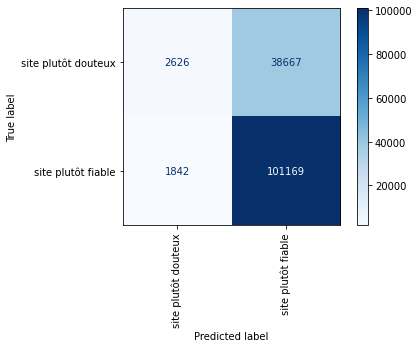

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


#matrice de confusion
#confrontation entre Y obs. sur l’éch. test et la prédiction
# predictions = best_rd_model.predict(df_test)

cm = confusion_matrix(y_test, 
                      predictions_SVM, 
                      labels=SVM.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=SVM.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='g',xticks_rotation='vertical')
plt.show()


In [68]:
"""prediction_overfitting = SVM.predict(Train_X_Tfidf)
accuracy = accuracy_score(prediction_overfitting, y_train)
print(accuracy*100)"""

72.26536693539073


In [69]:
matthews_corrcoef(y_test, predictions_SVM)

0.11927545555482019

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_SVM))

Tenter de rajouter le postagging pour chaque mot (ça dit si un mot est un verbe, adjectif, adverbe, ...)

Tester avec lemmatization

Plus tard on utilisera peut-être LIME pour voir ce qui se passe



In [73]:
predictions_SVM

array(['site plutôt fiable', 'site plutôt fiable', 'site plutôt fiable',
       ..., 'site plutôt fiable', 'site plutôt fiable',
       'site plutôt fiable'], dtype=object)

In [ ]:
Acc_test = []
Acc_train = []
for i in range(10):
  model=svm.SVC(kernel='poly', degree=i, C=100)
  model.fit(Train_X_Tfidf, y_train)
  Acc_test.append(model.score(Test_X_Tfidf, y_test))
  Acc_train.append(model.score(Train_X_Tfidf, y_train))
  print("Boucle n°",i+1)

In [ ]:
plt.plot(Acc_train,'-o')
plt.plot(Acc_test,'-o')
plt.ylim(0, 1) #trouvé le code pour choisir la taille
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','test'])
plt.title('Train vs Valid Accuracy')
# plt.savefig(res_folder+'/acc.png')
plt.show()

In [ ]:
# pd.DataFrame(predictions_SVM)
results = pd.DataFrame(X_test).reset_index()
results['predictions'] = predictions_SVM
results

In [ ]:
for index in results['index']:
  print(index, " is at position ", i)

In [ ]:
data

# Glove

In [ ]:
!wget http://nlp.stanford.edu/data/glove.twitter.27B.zip

In [ ]:
!unzip glove*.zip

In [ ]:
print('Indexing word vectors.')

embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
embeddings_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

In [ ]:
word_index = dict(zip(featured_names, range(len(featured_names))))

In [ ]:
word_index

In [ ]:
num_tokens = len(featured_names) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
        print("était "+word)
print("Converted %d words (%d misses)" % (hits, misses))


In [ ]:
! pip install glove-python-binary

In [ ]:
import glove
glove_corpus = glove.Corpus()

corpus_sentences = [ 
        [ w.lower() for w in next(corpus_sentence_tokens_gen)] # All lower-case
        for _ in range(0,100*1000) 
    ]

# Fit the co-occurrence matrix using a sliding window of 10 words.
glove_corpus.fit(corpus_sentences, window=10)

print("Dictionary length=%d" % (len(glove_corpus.dictionary),))

#A faire

Les trucs envoyés sur Facebook

tester word2vec (et glove aussi)

enlever caratères tout seul, enlever les gt (greater then)

Faire un excel qui compare les méthodes

Si les modèles changent pas les résultats alors améliorer en ammont (spacy?)

Penser à faire sur TOUS les tweets